# Steam Game popularity in steam graph

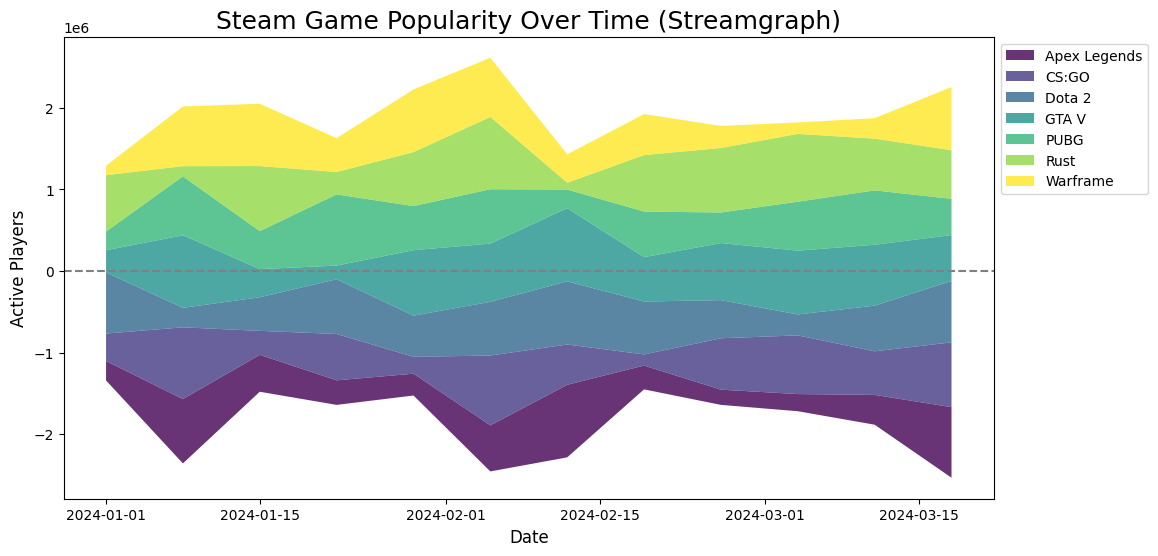

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = "steam_game_popularity.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Pivot DataFrame (Game names as columns, Date as index)
df_pivot = df.pivot(index="Date", columns="Game", values="Active_Players").fillna(0)

# Convert values to numeric (fixes string conversion issues)
df_pivot = df_pivot.apply(pd.to_numeric)

# Define colors for the games
colors = plt.cm.viridis(np.linspace(0, 1, len(df_pivot.columns)))

# Create Streamgraph using stackplot()
fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(df_pivot.index, df_pivot.T, labels=df_pivot.columns, colors=colors, baseline="wiggle", alpha=0.8)
ax.axhline(0, color= "gray", ls='--');


# Add title and labels
ax.set_title("Steam Game Popularity Over Time (Streamgraph)", fontsize=18)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Active Players", fontsize=12)

# Add legend
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show plot
plt.show()
